# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata,study_results, how = "outer", on = ["Mouse ID"])

# Display the data table for preview
combined_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data.loc[combined_data.duplicated(subset=["Mouse ID","Timepoint",]),"Mouse ID"]
duplicate_mice

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mice) == False]
cleaned_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_data["Mouse ID"].nunique()

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_group = cleaned_data.groupby('Drug Regimen')

regimen_mean = drug_group['Tumor Volume (mm3)'].mean()
regimen_median = drug_group['Tumor Volume (mm3)'].median()
regimen_variance = drug_group['Tumor Volume (mm3)'].var()
regimen_stdev = drug_group['Tumor Volume (mm3)'].std()
regimen_sem = drug_group['Tumor Volume (mm3)'].sem()
# Assemble the resulting series into a single summary DataFrame.
regimen_stats = pd.DataFrame({'Mean': regimen_mean, 'Median': regimen_median, 'Variance': regimen_variance,
                              'Startard Deviation': regimen_stdev, 'SEM': regimen_sem})
regimen_stats

,Mean,Median,Variance,Startard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

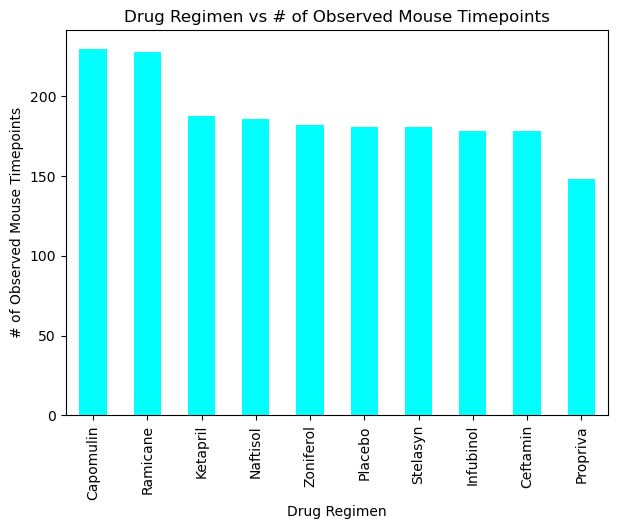

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_drug = cleaned_data['Drug Regimen'].value_counts()
mice_drug.plot(kind='bar', figsize=(7,5),xlabel='Drug Regimen',ylabel='# of Observed Mouse Timepoints', color = 'cyan')

# Set title of graph
plt.title('Drug Regimen vs # of Observed Mouse Timepoints')

plt.show()

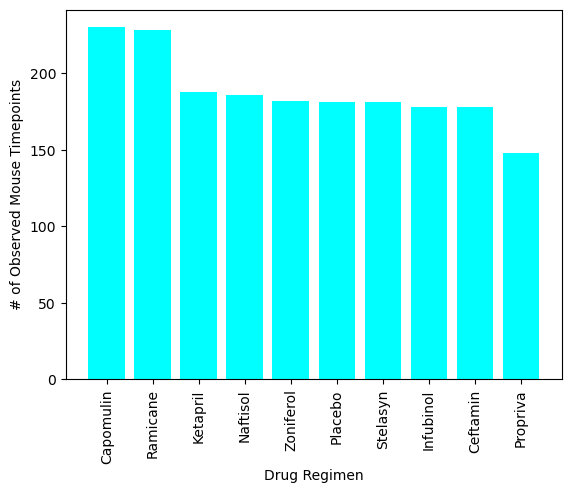

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
y_value = cleaned_data['Drug Regimen'].value_counts()
x_value = mice_drug.index

tick_location = [value for value in x_value]

# Produce graph
plt.bar(x_value,y_value, align ='center', color = 'cyan')

# Set label names
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation=90)

plt.show()


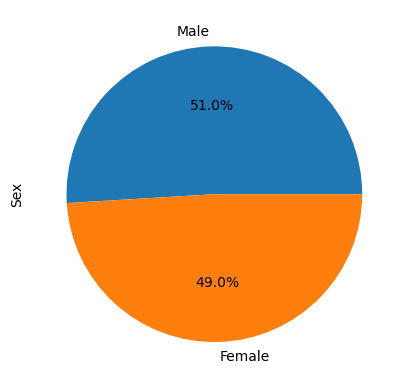

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_group = cleaned_data['Sex'].value_counts()
gender_group.plot(kind='pie', y = 'sex', autopct = '%1.1f%%')
plt.show()

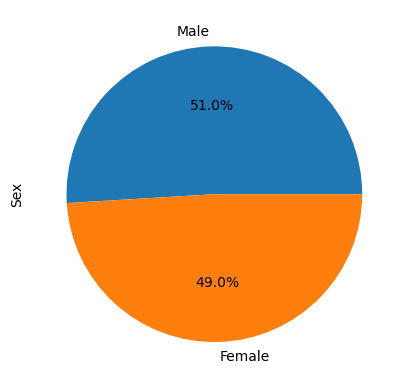

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Set labels
label = gender_group.index
plt.ylabel('Sex')

# Plot graph
plt.pie(gender_group, labels = label, startangle = 360, autopct = '%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

great_timepoint = pd.DataFrame(cleaned_data.groupby('Mouse ID')['Timepoint'].max()).reset_index().rename(columns={'Timepoint': 'Max_timepoint'})
great_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(combined_data, great_timepoint, on = 'Mouse ID')
merged_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45
...,...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2,45
1876,z969,Naftisol,Male,9,30,30,65.841013,3,45
1877,z969,Naftisol,Male,9,30,35,69.176246,4,45
1878,z969,Naftisol,Male,9,30,40,70.314904,4,45


In [14]:
# Put treatments into a list for a for loop (and later for plot labels)
treatment = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_info = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Loop and locate rows which contain mice with the specified drug and get the tumor volumes
for x in treatment:
    
    drug_max = merged_df.loc[merged_df['Drug Regimen'] == x]
    
    # add dataframes that only contains the final timepoint for regimens
    final_tp = drug_max.loc[drug_max['Timepoint'] == drug_max['Max_timepoint']]
    
    # Series with all the final volume for each regimen
    tumor_final = final_tp['Tumor Volume (mm3)']
    tumor_info.append(tumor_final)
    
    # Calculate the interquartile range for the regimens
    quart = tumor_final.quantile([0.25,0.5,0.75])
    low_q = quart[0.25]
    up_q = quart[0.75]
    inter_q = up_q-low_q
    
    # Print values for interquartile range for the regimens
    print(f'Interquartile range for {x}: {inter_q}')
    
    # Caculate lower and upper bounds for the regimens
    low_bd = low_q - (1.5*inter_q)
    up_bd = up_q + (1.5*inter_q)
    
    # Print values for lower and upper bounds for the regimens
    print(f'Lower bound for {x}: {low_q}')
    print(f'Upper bound for {x}: {up_q}')
    print('- - - - - - - - - - - - -')
    

Interquartile range for Capomulin: 7.781863460000004
Lower bound for Capomulin: 32.37735684
Upper bound for Capomulin: 40.1592203
- - - - - - - - - - - - -
Interquartile range for Ramicane: 9.098536719999998
Lower bound for Ramicane: 31.56046955
Upper bound for Ramicane: 40.65900627
- - - - - - - - - - - - -
Interquartile range for Infubinol: 11.477135160000003
Lower bound for Infubinol: 54.04860769
Upper bound for Infubinol: 65.52574285
- - - - - - - - - - - - -
Interquartile range for Ceftamin: 15.577752179999997
Lower bound for Ceftamin: 48.72207785
Upper bound for Ceftamin: 64.29983003
- - - - - - - - - - - - -


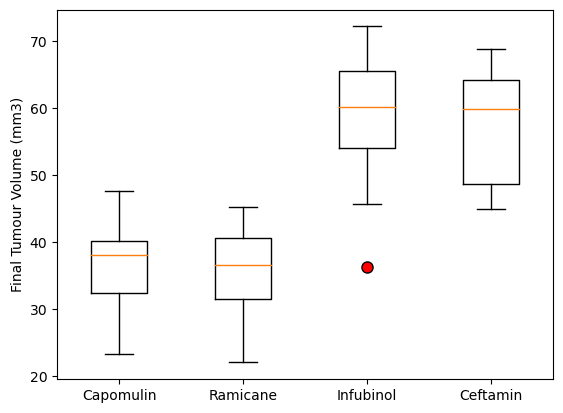

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax1 = plt.subplots() 

ax1.set_ylabel("Final Tumour Volume (mm3)") 
boxplot = ax1.boxplot(tumor_info, labels = treatment, flierprops={'marker': 'o', 'markerfacecolor': 'r', 'markersize': 8})

plt.show()

## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Display Capomulin mouses
capomulin_drug = cleaned_data.loc[cleaned_data["Drug Regimen"] == "Capomulin",:]
capomulin_drug

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


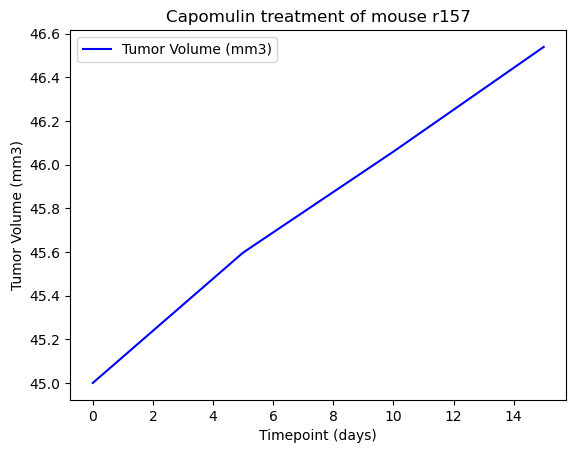

In [17]:
r157_mouse = capomulin_drug.loc[capomulin_drug['Mouse ID'] == 'r157']
r157_mouse = r157_mouse.plot.line(x = 'Timepoint', y = 'Tumor Volume (mm3)', color = 'blue')

plt.title('Capomulin treatment of mouse r157')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

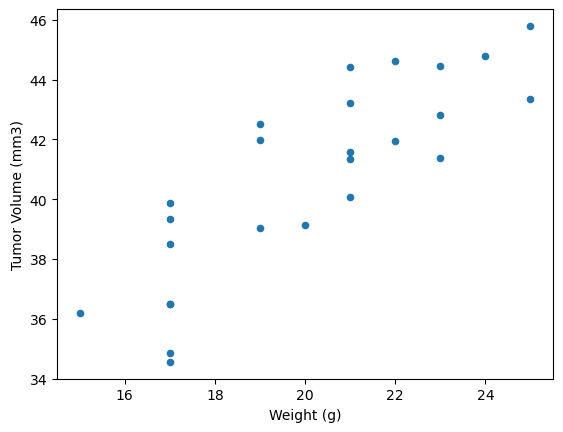

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Calculate average for tumor weight in Capomulin
average_tumor = capomulin_drug.groupby('Mouse ID').agg({'Weight (g)': 'mean','Tumor Volume (mm3)': 'mean'}) 

# Plot Graph
average_tumor.plot(kind='scatter', x= 'Weight (g)', y = 'Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen


The correlation between mouse weight and the average tumor volume is 0.84


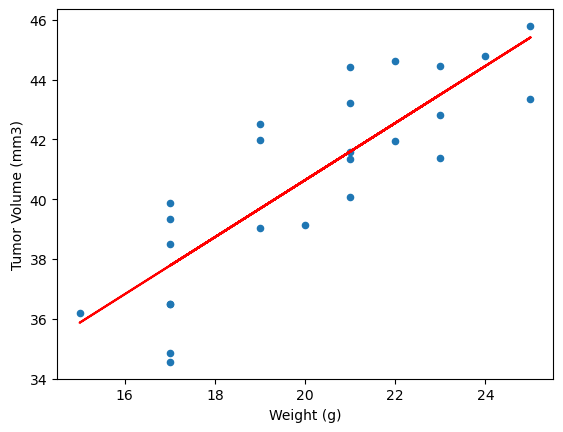

In [23]:
# Calculate the correlation coefficient and the linear regression model
x_val = average_tumor['Weight (g)']
y_val = average_tumor['Tumor Volume (mm3)']

# Calculate the correlation coefficient and a linear regression model 
correlation = st.pearsonr(x_val, y_val)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)

#Plot all components 
average_tumor.plot(kind='scatter', x= 'Weight (g)', y = 'Tumor Volume (mm3)')
plt.plot(x_val, slope * x_val + intercept, color='r')

# print correlation result
print(f'The correlation between mouse weight and the average tumor volume is {round(correlation[0],2)}')

plt.show()